<a href="https://colab.research.google.com/github/mzafir/aps/blob/master/DeepNN_MiniProject_2_Cohesive_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install PyTorch and YOLOv5 (if not already installed)
# !pip install torch torchvision

# Import necessary libraries
import torch
import os
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-6 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def process_file(file_path):
    # Function to process each file
    print(f"Processing file: {file_path}")

    aimg=Image.open(file_path).convert('RGB')
#img = Image.open('3983838909.jpeg').convert('RGB')
    aimg = aimg.resize((445,445))

# Convert image to a format YOLO expects
    img_t = torch.from_numpy(np.asarray(aimg)).permute(2,0,1).float() / 255.0
    img_t = img_t.unsqueeze(0)  # add batch dimension
    global results
    results = model(aimg)
    results.show()

In [4]:
def process_all_files_in_directory(directory):
    # List and process all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            process_file(file_path)
        else:
            print(f"Skipping {filename}, as it is not a file.")

In [5]:
directory = '/content/drive/My Drive/tesla_data'

Processing file: /content/drive/My Drive/tesla_data/839446199987122301.png


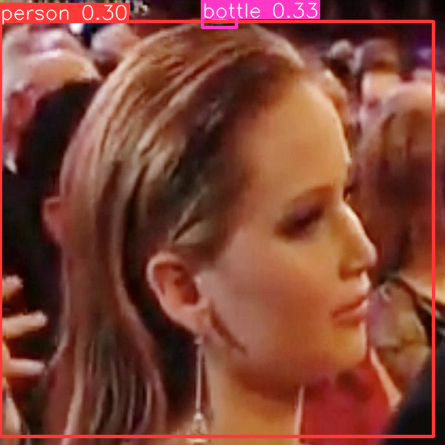

Processing file: /content/drive/My Drive/tesla_data/043296235949301137.png


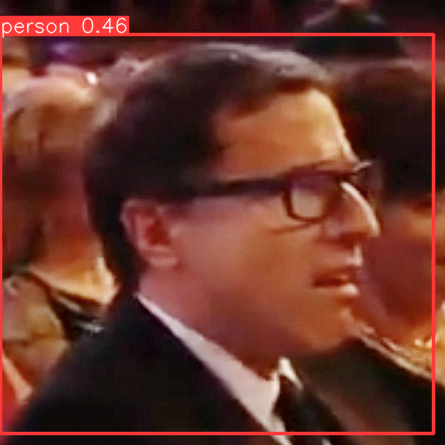

Processing file: /content/drive/My Drive/tesla_data/799678291276984938.png


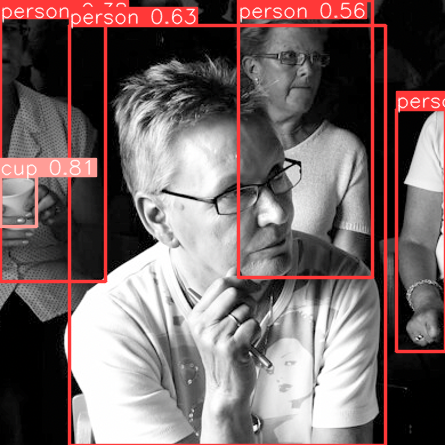

Processing file: /content/drive/My Drive/tesla_data/214337243937889570.png


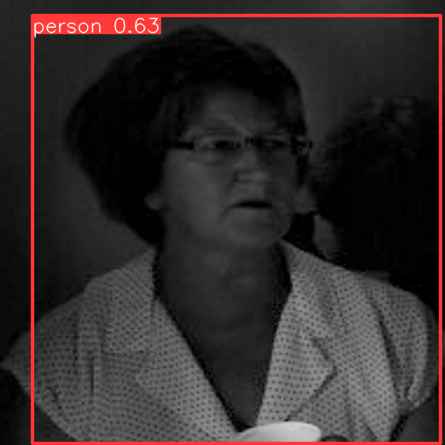

Processing file: /content/drive/My Drive/tesla_data/708817273097927582.png


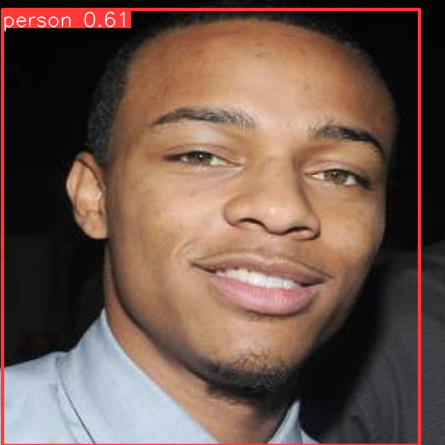

Processing file: /content/drive/My Drive/tesla_data/220998120807095697.png


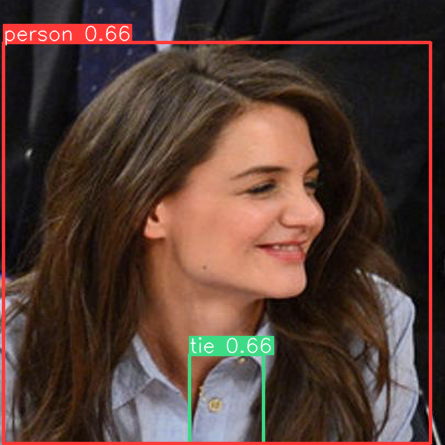

Processing file: /content/drive/My Drive/tesla_data/878279847017647556.png


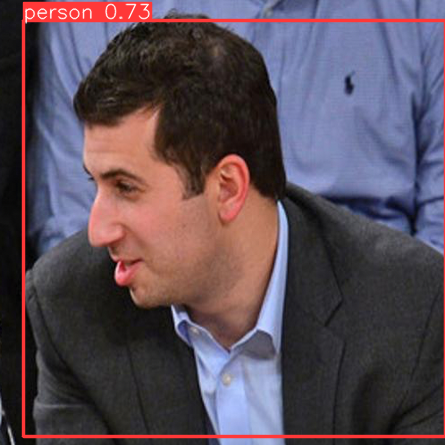

Skipping json_annot, as it is not a file.


In [6]:
process_all_files_in_directory(directory)

In [7]:
!pwd

/content


In [8]:
# Load an image from a URL

"""
# Or use an uploaded file in Colab
for num in
aimg=Image.open('/content/drive/My Drive/').convert('RGB')
#img = Image.open('3983838909.jpeg').convert('RGB')
aimg = aimg.resize((445,445))

# Convert image to a format YOLO expects
img_t = torch.from_numpy(np.asarray(aimg)).permute(2,0,1).float() / 255.0
img_t = img_t.unsqueeze(0)  # add batch dimension
"""

"\n# Or use an uploaded file in Colab\nfor num in\naimg=Image.open('/content/drive/My Drive/').convert('RGB')\n#img = Image.open('3983838909.jpeg').convert('RGB')\naimg = aimg.resize((445,445))\n\n# Convert image to a format YOLO expects\nimg_t = torch.from_numpy(np.asarray(aimg)).permute(2,0,1).float() / 255.0\nimg_t = img_t.unsqueeze(0)  # add batch dimension\n"

In [9]:
results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,23.089922,20.664944,445.0,436.122375,0.733794,0,person


In [24]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'model' is a YOLO model that has been loaded and is ready to use

cropped_images = {}

def yolo_detect_faces(image_path, confidence_threshold=0.3):
    # Load and process the image
    aimg = Image.open(image_path).convert('RGB')
    aimg = aimg.resize((445, 445))  # Resize image to be suitable for the model
    results = model(aimg)  # Run detection

    # Filter detections to keep only 'person' with high enough confidence
    detections = results.pandas().xyxy[0]  # Get detections in a pandas DataFrame
    detections = detections[(detections['name'] == 'person') & (detections['confidence'] >= confidence_threshold)]

    coordinates = []
    for index, row in detections.iterrows():
        xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        if xmin >= 0 and ymin >= 0 and xmax <= aimg.width and ymax <= aimg.height:
            cropped_img = aimg.crop((xmin, ymin, xmax, ymax))  # Crop the detected region
            cropped_images[image_path] = [xmin, ymin, xmax, ymax]
            coordinates.append((xmin, ymin, xmax, ymax))  # Store coordinates for reference
            cropped_img.save(f"detected_face_{index}.jpg")  # Save the cropped image
        else:
            print(f"Skipping invalid box with coordinates: {(xmin, ymin, xmax, ymax)}")

    return cropped_images, coordinates

# Example usage
def process_emotions(file_path):
    cropped_images, face_coordinates = yolo_detect_faces(file_path, confidence_threshold=0.3)
    print(f"File Path: {file_path}")
    print(f"Number of detected faces: {len(face_coordinates)}")
    for coord in face_coordinates:
        print(coord)
    plt.show()



In [25]:
def show_image(image_con):
  from IPython.display import display

# Assuming 'cropped_images' is your list of PIL Image objects
  for img in image_con:
    display(img)


In [26]:
def process_all_files_in_directory_emotions(directory):
    # List and process all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            process_emotions(file_path)
        else:
            print(f"Skipping {filename}, as it is not a file.")

In [27]:
process_all_files_in_directory_emotions(directory=directory)

File Path: /content/drive/My Drive/tesla_data/839446199987122301.png
Number of detected faces: 0
File Path: /content/drive/My Drive/tesla_data/043296235949301137.png
Number of detected faces: 1
(0, 34, 433, 433)
File Path: /content/drive/My Drive/tesla_data/799678291276984938.png
Number of detected faces: 4
(69, 25, 385, 445)
(238, 0, 372, 277)
(396, 109, 445, 351)
(0, 0, 105, 281)
File Path: /content/drive/My Drive/tesla_data/214337243937889570.png
Number of detected faces: 1
(32, 15, 440, 443)
File Path: /content/drive/My Drive/tesla_data/708817273097927582.png
Number of detected faces: 1
(2, 9, 419, 445)
File Path: /content/drive/My Drive/tesla_data/220998120807095697.png
Number of detected faces: 1
(3, 42, 430, 443)
File Path: /content/drive/My Drive/tesla_data/878279847017647556.png
Number of detected faces: 1
(23, 20, 445, 436)
Skipping json_annot, as it is not a file.


In [28]:
!pip install deepface

In [38]:
from deepface import DeepFace
from PIL import Image
import pandas as pd
import numpy as np

def analyze_emotions(cropped_images):
    emotions = []

    for image_path, bbox in cropped_images.items():
        try:
            img = Image.open(image_path)
            xmin, ymin, xmax, ymax = bbox
            img_cropped = img.crop((xmin, ymin, xmax, ymax))

            img_array = np.array(img_cropped)
            analysis = DeepFace.analyze(img_array, actions=['emotion'], enforce_detection=False)

            emotion_data = analysis[0]['emotion'] if 'emotion' in analysis[0] else {}

            dominant_emotion = analysis[0]['dominant_emotion'] if 'dominant_emotion' in analysis[0] else "Unknown"

            emotions.append({
                "image_path": image_path,
                "emotions": emotion_data,
                "dominant_emotion": dominant_emotion
            })
        except Exception as e:
            print(f"Error processing image {image_path}:", e)
            emotions.append({
                "image_path": image_path,
                "emotions": None,
                "dominant_emotion": None
            })

    return emotions

emotions = analyze_emotions(cropped_images)
if emotions:
    emotions_df = pd.DataFrame(emotions)
    print(emotions_df)


emotions_df

                                          image_path  \
0  /content/drive/My Drive/tesla_data/04329623594...   
1  /content/drive/My Drive/tesla_data/79967829127...   
2  /content/drive/My Drive/tesla_data/21433724393...   
3  /content/drive/My Drive/tesla_data/70881727309...   
4  /content/drive/My Drive/tesla_data/22099812080...   
5  /content/drive/My Drive/tesla_data/87827984701...   

                                            emotions dominant_emotion  
0  {'angry': 0.007018142477992101, 'disgust': 5.6...              sad  
1  {'angry': 0.0013558077524560002, 'disgust': 2....              sad  
2  {'angry': 99.80593326021037, 'disgust': 0.0941...            angry  
3  {'angry': 0.00015191174043138744, 'disgust': 3...            happy  
4  {'angry': 1.6888614950971714e-06, 'disgust': 2...            happy  
5  {'angry': 0.04766174533870071, 'disgust': 0.00...            happy  


,image_path,emotions,dominant_emotion
0,/content/drive/My Drive/tesla_data/04329623594...,"{'angry': 0.007018142477992101, 'disgust': 5.6...",sad
1,/content/drive/My Drive/tesla_data/79967829127...,"{'angry': 0.0013558077524560002, 'disgust': 2....",sad
2,/content/drive/My Drive/tesla_data/21433724393...,"{'angry': 99.80593326021037, 'disgust': 0.0941...",angry
3,/content/drive/My Drive/tesla_data/70881727309...,"{'angry': 0.00015191174043138744, 'disgust': 3...",happy
4,/content/drive/My Drive/tesla_data/22099812080...,"{'angry': 1.6888614950971714e-06, 'disgust': 2...",happy
5,/content/drive/My Drive/tesla_data/87827984701...,"{'angry': 0.04766174533870071, 'disgust': 0.00...",happy


In [44]:
import pandas as pd
import json

# Example DataFrame creation (if needed)
data = {
    'fileName': ['220998120807095697.png', '799678291276984938.png', '708817273097927582.png',
                 '043296235949301137.png', '878279847017647556.png', '839446199987122301.png'],
    'resolution': ['0,0', '0,0', '0,0', '0,0', '0,0', '0,0'],
    'regions': [
        {'class': 6, 'shape': 'rectangle', 'points': {'x': [69, 378], 'y': [43, 378]}},
        {'class': 8, 'shape': 'rectangle', 'points': {'x': [71, 375], 'y': [29, 325]}},
        {'class': 7, 'shape': 'rectangle', 'points': {'x': [89, 484], 'y': [2, 527]}},
        {'class': 4, 'shape': 'rectangle', 'points': {'x': [90, 519], 'y': [32, 509]}},
        {'class': 10, 'shape': 'rectangle', 'points': {'x': [23, 487], 'y': [19, 405]}},
        {'class': 8, 'shape': 'rectangle', 'points': {'x': [75, 654], 'y': [12, 508]}}
    ],
    'classNames.6': ['amused', 'amused', 'amused', 'amused', 'amused', 'amused'],
    'classNames.7': ['confident', 'confident', 'confident', 'confident', 'confident', 'confident'],
    # Add other classNames columns as necessary
}

df = pd.DataFrame(data)

# Define a function to replace class numbers with corresponding class names
def replace_class_with_names(row):
    class_num = row['regions']['class']  # Get the class number from regions
    class_name_column = f'classNames.{class_num}'  # Form the columnName

    if class_name_column in row.index:
        class_name = row[class_name_column]  # Get the class name using the column name
    else:
        class_name = 'Unknown'  # Default value if class name column does not exist


    row['regions']['class'] = class_name  # Replace the class number with class name in regions
    return row

# Apply the function across the DataFrame
df = df.apply(replace_class_with_names, axis=1)

# Print the updated DataFrame
print(df[['fileName', 'regions']])

# Check for missing class name columns based on regions
all_class_nums = set(df['regions'].apply(lambda x: x['class']))
existing_columns = set(df.columns)
missing_columns = [f'classNames.{num}' for num in all_class_nums if f'classNames.{num}' not in existing_columns]

print("Missing columns:", missing_columns)

# Add missing columns with default value 'Unknown'
for column in missing_columns:
    df[column] = 'Unknown'


                 fileName                                            regions
0  220998120807095697.png  {'class': 'amused', 'shape': 'rectangle', 'poi...
1  799678291276984938.png  {'class': 'Unknown', 'shape': 'rectangle', 'po...
2  708817273097927582.png  {'class': 'confident', 'shape': 'rectangle', '...
3  043296235949301137.png  {'class': 'Unknown', 'shape': 'rectangle', 'po...
4  878279847017647556.png  {'class': 'Unknown', 'shape': 'rectangle', 'po...
5  839446199987122301.png  {'class': 'Unknown', 'shape': 'rectangle', 'po...
Missing columns: ['classNames.amused', 'classNames.confident', 'classNames.Unknown']


**Everything Combined Here**

In [69]:
data_list_col=emotions_df.image_path

In [70]:
data_list_col

0    /content/drive/My Drive/tesla_data/04329623594...
1    /content/drive/My Drive/tesla_data/79967829127...
2    /content/drive/My Drive/tesla_data/21433724393...
3    /content/drive/My Drive/tesla_data/70881727309...
4    /content/drive/My Drive/tesla_data/22099812080...
5    /content/drive/My Drive/tesla_data/87827984701...
Name: image_path, dtype: object

In [102]:
filename_da=[]
for i in emotions_df.image_path:
  filename_da.append(os.path.basename(i))



In [103]:
filename_da

['043296235949301137.png',
 '799678291276984938.png',
 '214337243937889570.png',
 '708817273097927582.png',
 '220998120807095697.png',
 '878279847017647556.png']

In [104]:
filename_da_df=pd.DataFrame(filename_da)

In [105]:
filename_da_df.rename(columns={'0':'fname'}, inplace=True)

In [106]:
filename_da_df.columns=['fname']

In [107]:
filename_da_df

,fname
0,043296235949301137.png
1,799678291276984938.png
2,214337243937889570.png
3,708817273097927582.png
4,220998120807095697.png
5,878279847017647556.png


In [48]:
cropped_images_df=pd.DataFrame(cropped_images)

In [62]:
cropped_images_df.transpose().index

Index(['/content/drive/My Drive/tesla_data/043296235949301137.png',
       '/content/drive/My Drive/tesla_data/799678291276984938.png',
       '/content/drive/My Drive/tesla_data/214337243937889570.png',
       '/content/drive/My Drive/tesla_data/708817273097927582.png',
       '/content/drive/My Drive/tesla_data/220998120807095697.png',
       '/content/drive/My Drive/tesla_data/878279847017647556.png'],
      dtype='object')

In [108]:
df


,fileName,resolution,regions,classNames.6,classNames.7,classNames.amused,classNames.confident,classNames.Unknown
0,220998120807095697.png,"0,0","{'class': 'amused', 'shape': 'rectangle', 'poi...",amused,confident,Unknown,Unknown,Unknown
1,799678291276984938.png,"0,0","{'class': 'Unknown', 'shape': 'rectangle', 'po...",amused,confident,Unknown,Unknown,Unknown
2,708817273097927582.png,"0,0","{'class': 'confident', 'shape': 'rectangle', '...",amused,confident,Unknown,Unknown,Unknown
3,043296235949301137.png,"0,0","{'class': 'Unknown', 'shape': 'rectangle', 'po...",amused,confident,Unknown,Unknown,Unknown
4,878279847017647556.png,"0,0","{'class': 'Unknown', 'shape': 'rectangle', 'po...",amused,confident,Unknown,Unknown,Unknown
5,839446199987122301.png,"0,0","{'class': 'Unknown', 'shape': 'rectangle', 'po...",amused,confident,Unknown,Unknown,Unknown


In [109]:
emotions_df.image_path

0    043296235949301137.png
1    799678291276984938.png
2    214337243937889570.png
3    708817273097927582.png
4    220998120807095697.png
5    878279847017647556.png
Name: image_path, dtype: object

In [110]:
# Assuming emotions_df is your DataFrame and image_path is the column with full file paths
emotions_df['image_path'] = emotions_df['image_path'].apply(lambda x: os.path.basename(x))

print(emotions_df['image_path'])


0    043296235949301137.png
1    799678291276984938.png
2    214337243937889570.png
3    708817273097927582.png
4    220998120807095697.png
5    878279847017647556.png
Name: image_path, dtype: object


In [111]:
emotions_df

,image_path,emotions,dominant_emotion
0,043296235949301137.png,"{'angry': 0.007018142477992101, 'disgust': 5.6...",sad
1,799678291276984938.png,"{'angry': 0.0013558077524560002, 'disgust': 2....",sad
2,214337243937889570.png,"{'angry': 99.80593326021037, 'disgust': 0.0941...",angry
3,708817273097927582.png,"{'angry': 0.00015191174043138744, 'disgust': 3...",happy
4,220998120807095697.png,"{'angry': 1.6888614950971714e-06, 'disgust': 2...",happy
5,878279847017647556.png,"{'angry': 0.04766174533870071, 'disgust': 0.00...",happy


In [112]:
merged_df = pd.merge(filename_da_df, emotions_df, left_on='fname', right_on='image_path')


In [ ]:
merged_df

In [94]:
filename_da_df.columns=['labeled_emotions']

In [117]:
filename_da_df['labeled_name'][1]='happy'

In [119]:
filename_da_df[0]='disgust'

In [129]:
filename_da_df.drop(0, axis=1, inplace=True)


In [142]:
filename_da_df['labeled_name'][5]='happy'

In [ ]:
filename_da_df

In [144]:
filename_da_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fname         6 non-null      object
 1   labeled_name  6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes


In [ ]:
emotions_df

In [151]:
# Using outer join to see all data
merged_df = pd.merge(emotions_df, filename_da_df, left_on='image_path', right_on='labeled_name', how='outer')


In [ ]:
merged_df

In [ ]:
print("Unique values in emotions_df['image_path']:", emotions_df['image_path'].unique())
print("Unique values in filename_df['labeled_name']:", filename_da_df['labeled_name'].unique())


In [ ]:
filename_da_df

In [158]:
emotions_df['labeled_name'] = filename_da_df['labeled_name']


In [ ]:
emotions_df.info()

In [161]:
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Example setup (assuming df is your DataFrame)
# Make sure the DataFrame 'df' has the columns 'dominant_emotion' and 'labeled_name'


In [167]:
import pandas as pd
import torch
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Create a DataFrame as an example
df = pd.DataFrame({
    'dominant_emotion': ['happy', 'sad', 'happy'],
    'labeled_name': ['sad', 'sad', 'neutral']
})

# Label Encoding
label_encoder = LabelEncoder()

# Include all possible categories from both columns
all_emotions = pd.concat([df['dominant_emotion'], df['labeled_name']]).unique()
label_encoder.fit(all_emotions)

# Transform labels to integer classes
dominant_encoded = label_encoder.transform(df['dominant_emotion']).reshape(-1, 1)
labeled_encoded = label_encoder.transform(df['labeled_name']).reshape(-1, 1)

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # handle_unknown='ignore' to avoid future errors
onehot_encoder.fit(label_encoder.transform(all_emotions).reshape(-1, 1))  # Fit to all known categories

# Transform to one-hot
dominant_onehot = onehot_encoder.transform(dominant_encoded)
labeled_onehot = onehot_encoder.transform(labeled_encoded)

# PyTorch tensors
dominant_tensor = torch.tensor(dominant_onehot, dtype=torch.float32)
labeled_tensor = torch.tensor(labeled_onehot, dtype=torch.float32)

# Compute log probabilities for cross-entropy loss
log_probs = F.log_softmax(dominant_tensor, dim=1)

# Cross-entropy loss
loss = F.nll_loss(log_probs, torch.max(labeled_tensor, 1)[1])

print("Cross-entropy loss:", loss.item())


Cross-entropy loss: 1.2181113958358765
